# ODE Models from Optimal Control book

## Simple Generalized Logistic Growth
The following cell models General logistic growth

In [31]:
import numpy as np
import matplotlib.pyplot as plt


In [184]:
def Fp(p0,e=0.5,q=2000,v=0.5):
    dp=e*p0*(1-(p0/q)**v)
    return(dp)

In [185]:
p0 =100
q=2000
e=0.5

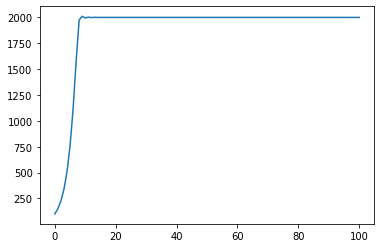

In [186]:
fig = plt.figure()
v=3
p = p0
pvec=[p]
for t in range(0,100):
    p=p+Fp(p,e,q,v)
    pvec.append(p)
plt.plot(pvec)
fig

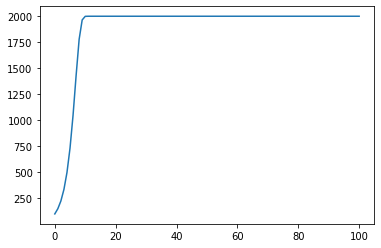

In [187]:
fig = plt.figure()
v=2
p = p0
pvec=[p]
for t in range(0,100):
    p=d_dot(p,e,q,v)
    pvec.append(p)
plt.plot(pvec)
fig

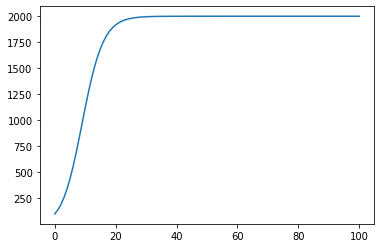

In [30]:
fig = plt.figure()
v=0.5
p = p0
pvec=[p]
for t in range(0,100):
    p=d_dot(p,e,q,v)
    pvec.append(p)
plt.plot(pvec)
fig

## Adding Radiotherapy  

In [ ]:
def curvD (lph, bet, D):
    p=np.exp(-lph*D-bet*D**2)
    return(p)

### Radiotherapy curve

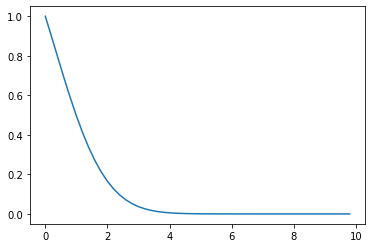

In [84]:
fig.clear()
fig = plt.figure()
D = [i/5 for i in range(0,50)]
lph=0.5
bet=0.2
curv =[curvD(lph,bet,i) for i in D]
plt.plot(D,curv)

fig

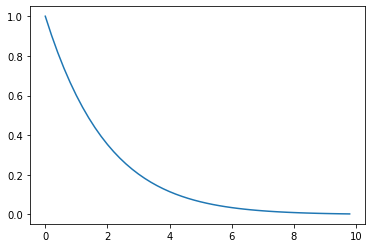

In [92]:
fig.clear()
fig = plt.figure()
D = [i/5 for i in range(0,50)]
lph=0.5
bet=0.01
curv =[curvD(lph,bet,i) for i in D]
plt.plot(D,curv)

fig

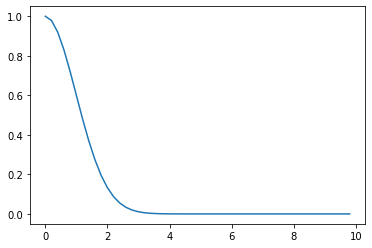

In [90]:
fig.clear()
fig = plt.figure()
D = [i/5 for i in range(0,50)]
lph=0.01
bet=0.5
curv =[curvD(lph,bet,i) for i in D]
plt.plot(D,curv)

fig

## Coupled Equation w Repair 

In [198]:
def dotp(p,lph,bet,r,w) :
    dp= Fp(p)-(lph + 2*bet*r)*p*w
    return(p+dp)

def dotr(ro,r,w) :
    dr = -ro*r + w
    return(r+dr)

ro is the Repair rate for the tissue, w is the dose, r models long term repair efficiency

In [206]:
p=p0=1000
pvec=[p0]
r=r0=0
rvec=[r0]
w = 2
lph = 0.01
bet = 0.01
ro = 0.05

for t in range(0,100):
    p = dotp(p,lph,bet,r,w)
    r = dotr(ro,r,w)
    pvec.append(p)
    rvec.append(r)

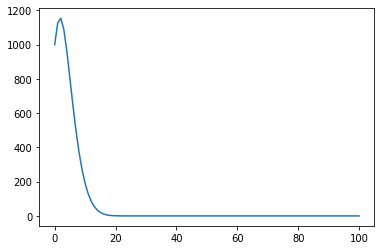

In [207]:
fig.clear()
fig = plt.figure()
plt.plot(pvec)
fig

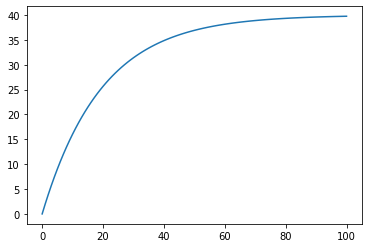

In [208]:
fig = plt.figure()
plt.plot(rvec)
fig

## Chemotherapy 
### Log-kill model

In [211]:
def pdot_chemo(p,phi,c):
    dp = Fp(p) - phi*c*p #c = conc of chemo, phi = effectiveness
    return(p+dp)

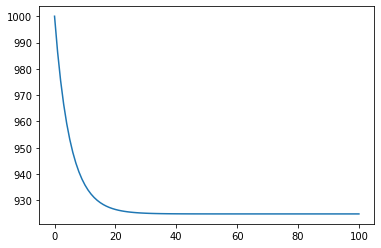

In [215]:
p=p0=1000
pvec=[p0]
phi = 0.8
c = 0.2

for t in range(0,100):
    p = pdot_chemo(p,phi,c)
    pvec.append(p)

fig = plt.figure()
plt.plot(pvec)
fig

## anti-ngiogenic Therapy 
The idea for this model is the carrying capacity <italic>q</italic> depends on the state of the micro-environment

    pdot = pF(p/q)
    qdot = S(p,q) -I(p,q)

Adding Chemotherapy & anti angiogenic agents

    pdot = pF(p/q) - phi * v * p
    qdot = S(p,q) - I(p,q) - gmma * u * q - nu * v *q